In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Loading the dataset
df = pd.read_csv("/Users/wasaysaudagar/Downloads/Top 50 US Tech Companies 2022 - 2023.csv")

In [39]:
df

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


In [40]:
# Display the first few rows of the dataframe
print(df.head())

# Get information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

            Company Name    Industry                   Sector    HQ State  \
0             Apple Inc.  Technology     Consumer Electronics  California   
1  Microsoft Corporation  Technology  Software Infrastructure  Washington   
2      Alphabet (Google)  Technology  Software Infrastructure  California   
3                 Amazon  Technology     Software Application  Washington   
4     NVIDIA Corporation  Technology           Semiconductors  California   

   Founding Year  Annual Revenue 2022-2023 (USD in Billions)  \
0           1976                                      387.53   
1           1975                                      204.09   
2           1998                                      282.83   
3           1994                                      513.98   
4           1993                                       26.97   

   Market Cap (USD in Trillions) Stock Name  \
0                          2.520       AAPL   
1                          2.037       MSFT   
2          

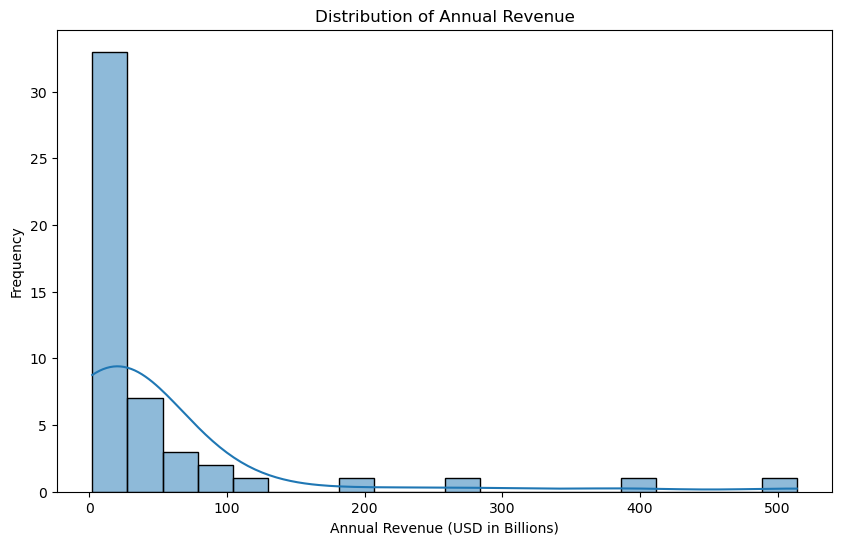

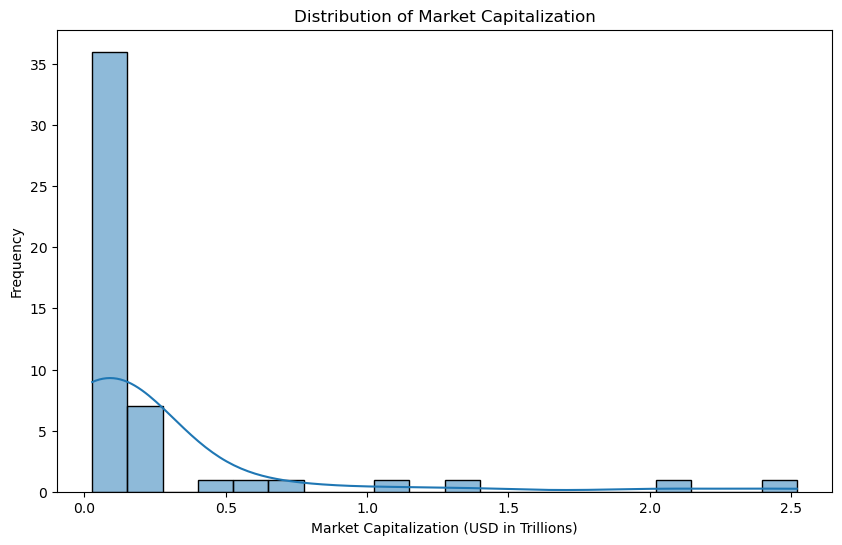

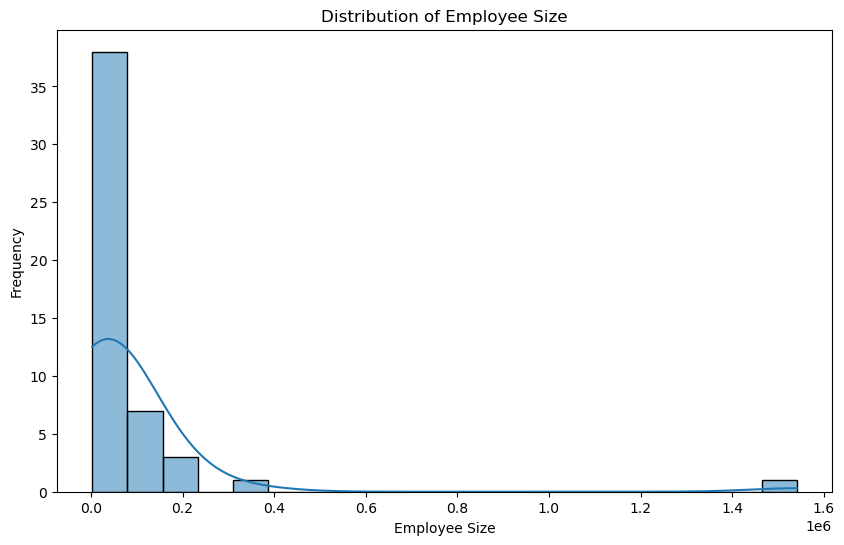

In [41]:
# Plot distribution of Annual Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Revenue 2022-2023 (USD in Billions)'], bins=20, kde=True)
plt.title('Distribution of Annual Revenue')
plt.xlabel('Annual Revenue (USD in Billions)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Market Capitalization
plt.figure(figsize=(10, 6))
sns.histplot(df['Market Cap (USD in Trillions)'], bins=20, kde=True)
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Capitalization (USD in Trillions)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Employee Size
plt.figure(figsize=(10, 6))
sns.histplot(df['Employee Size'], bins=20, kde=True)
plt.title('Distribution of Employee Size')
plt.xlabel('Employee Size')
plt.ylabel('Frequency')
plt.show()


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [43]:
# Encode categorical variables
encoder = OneHotEncoder()
transformer = ColumnTransformer(transformers=[
    ('cat', encoder, ['Company Name', 'Industry', 'Sector', 'HQ State', 'Stock Name'])
], remainder='passthrough')
X = transformer.fit_transform(df.drop(columns=['Market Cap (USD in Trillions)']))
y = df['Market Cap (USD in Trillions)']

In [44]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

In [46]:
# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")

Linear Regression: Mean Squared Error = 0.010346481414462826
Random Forest Regression: Mean Squared Error = 0.01964997981
Gradient Boosting Regression: Mean Squared Error = 0.035087799037981385


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.010346481414462826


In [48]:
# Load the dataset
# Assuming the dataset is stored in a DataFrame named 'df'

# Define a function to calculate tax efficiency ratios
def calculate_tax_efficiency_ratio(row):
    revenue = row['Annual Revenue 2022-2023 (USD in Billions)']
    income_tax = row['Annual Income Tax in 2022-2023 (USD in Billions)']
    
    # Calculate tax efficiency ratio
    if revenue != 0:
        tax_efficiency_ratio = income_tax / revenue
    else:
        tax_efficiency_ratio = None
    
    return tax_efficiency_ratio

# Apply the function to calculate tax efficiency ratios for each company
df['Tax Efficiency Ratio'] = df.apply(calculate_tax_efficiency_ratio, axis=1)

# Identify companies with highest and lowest tax burdens
highest_tax_burden = df[df['Tax Efficiency Ratio'].notnull()].nlargest(5, 'Tax Efficiency Ratio')
lowest_tax_burden = df[df['Tax Efficiency Ratio'].notnull()].nsmallest(5, 'Tax Efficiency Ratio')

# Investigate factors influencing tax efficiency
# Example: Analyze tax efficiency by industry type
industry_tax_efficiency = df.groupby('Industry')['Tax Efficiency Ratio'].mean()

# Print results or perform further analysis as needed
print("Companies with Highest Tax Burdens:")
print(highest_tax_burden[['Company Name', 'Tax Efficiency Ratio']])
print("\nCompanies with Lowest Tax Burdens:")
print(lowest_tax_burden[['Company Name', 'Tax Efficiency Ratio']])
print("\nTax Efficiency by Industry:")
print(industry_tax_efficiency)


Companies with Highest Tax Burdens:
                   Company Name  Tax Efficiency Ratio
1         Microsoft Corporation              0.074178
11                   Adobe Inc.              0.071136
12       Texas Instruments Inc.              0.064086
34  Cadence Design Systems Inc.              0.055056
42           Roper Technologies              0.052763

Companies with Lowest Tax Burdens:
                         Company Name  Tax Efficiency Ratio
18                    IBM Corporation             -0.010344
3                              Amazon             -0.006259
28             Uber Technologies Inc.             -0.005679
13  Advanced Micro Devices (AMD) Inc.             -0.005169
16                  Intel Corporation             -0.003949

Tax Efficiency by Industry:
Industry
Technology    0.026367
Name: Tax Efficiency Ratio, dtype: float64


In [51]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
tech_companies = pd.read_csv('/Users/wasaysaudagar/Downloads/Top 50 US Tech Companies 2022 - 2023.csv')

# Exploratory Data Analysis
print(tech_companies.head())
print(tech_companies.info())
print(tech_companies.describe())



            Company Name    Industry                   Sector    HQ State  \
0             Apple Inc.  Technology     Consumer Electronics  California   
1  Microsoft Corporation  Technology  Software Infrastructure  Washington   
2      Alphabet (Google)  Technology  Software Infrastructure  California   
3                 Amazon  Technology     Software Application  Washington   
4     NVIDIA Corporation  Technology           Semiconductors  California   

   Founding Year  Annual Revenue 2022-2023 (USD in Billions)  \
0           1976                                      387.53   
1           1975                                      204.09   
2           1998                                      282.83   
3           1994                                      513.98   
4           1993                                       26.97   

   Market Cap (USD in Trillions) Stock Name  \
0                          2.520       AAPL   
1                          2.037       MSFT   
2          

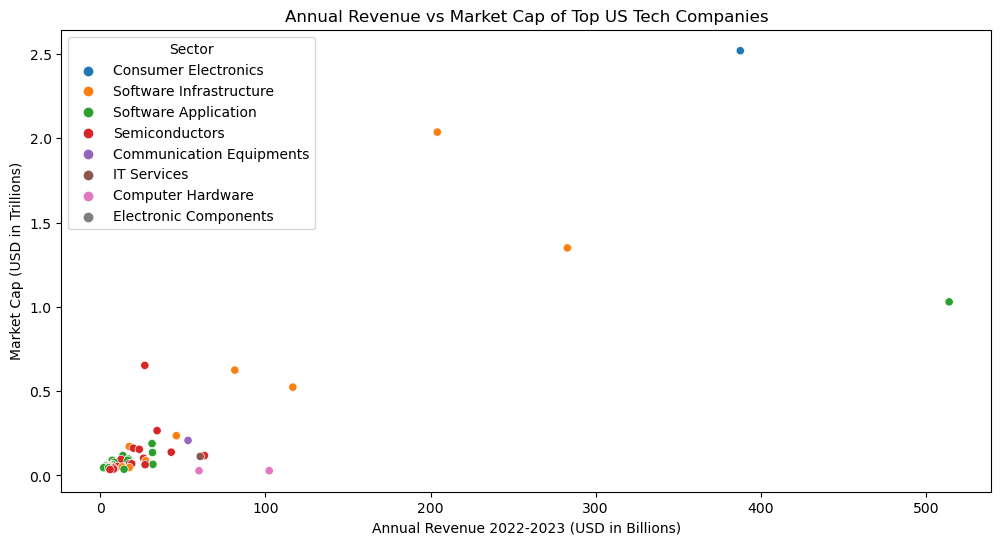

In [52]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Revenue 2022-2023 (USD in Billions)', y='Market Cap (USD in Trillions)', data=tech_companies, hue='Sector')
plt.title('Annual Revenue vs Market Cap of Top US Tech Companies')
plt.show()

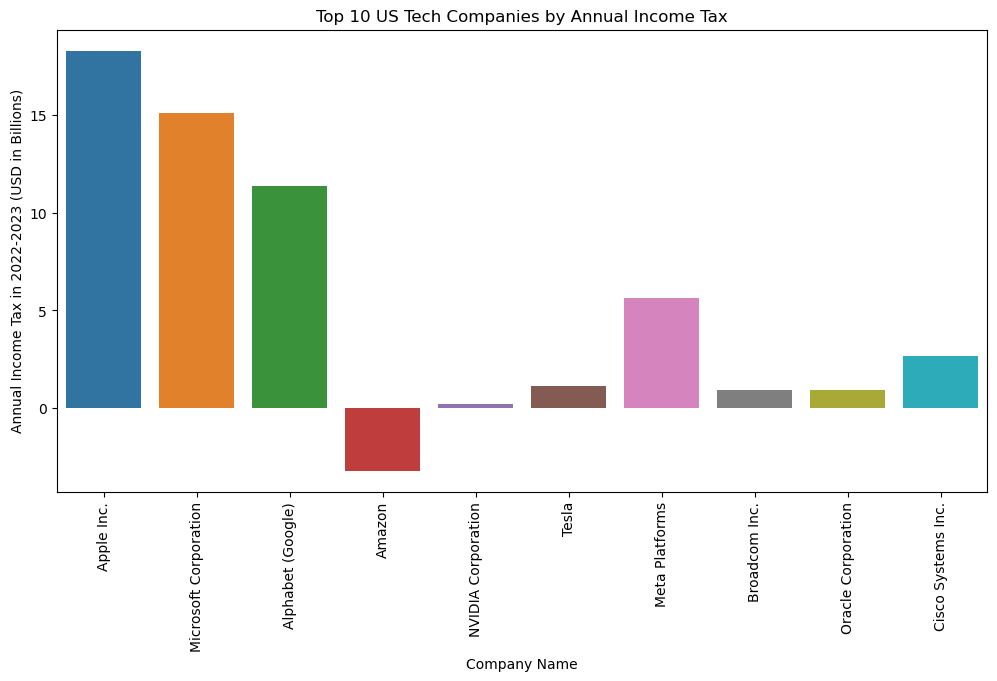

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Company Name', y='Annual Income Tax in 2022-2023 (USD in Billions)', data=tech_companies.head(10))
plt.xticks(rotation=90)
plt.title('Top 10 US Tech Companies by Annual Income Tax')
plt.show()

In [54]:

# Data Analysis
top_revenue = tech_companies.nlargest(5, 'Annual Revenue 2022-2023 (USD in Billions)')
print('Top 5 US Tech Companies by Annual Revenue:')
print(top_revenue[['Company Name', 'Annual Revenue 2022-2023 (USD in Billions)']])

Top 5 US Tech Companies by Annual Revenue:
            Company Name  Annual Revenue 2022-2023 (USD in Billions)
3                 Amazon                                      513.98
0             Apple Inc.                                      387.53
2      Alphabet (Google)                                      282.83
1  Microsoft Corporation                                      204.09
6         Meta Platforms                                      116.60


In [55]:
top_market_cap = tech_companies.nlargest(5, 'Market Cap (USD in Trillions)')
print('\nTop 5 US Tech Companies by Market Capitalization:')
print(top_market_cap[['Company Name', 'Market Cap (USD in Trillions)']])

# Save the cleaned and processed data
tech_companies.to_csv('cleaned_tech_companies.csv', index=False)


Top 5 US Tech Companies by Market Capitalization:
            Company Name  Market Cap (USD in Trillions)
0             Apple Inc.                          2.520
1  Microsoft Corporation                          2.037
2      Alphabet (Google)                          1.350
3                 Amazon                          1.030
4     NVIDIA Corporation                          0.653


In [56]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Prepare data for machine learning
X = tech_companies[['Annual Revenue 2022-2023 (USD in Billions)', 'Employee Size']]
y = tech_companies['Market Cap (USD in Trillions)']

In [58]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression RMSE: {lr_rmse:.3f}')
print(f'Linear Regression R-squared: {lr_r2:.3f}')

Linear Regression RMSE: 0.165
Linear Regression R-squared: -19.096


In [60]:
# Random Forest Regression Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rf_rmse:.3f}')
print(f'Random Forest R-squared: {rf_r2:.3f}')

Random Forest RMSE: 0.181
Random Forest R-squared: -22.947


In [74]:
# Make predictions on new data
new_data = pd.DataFrame({'Annual Revenue 2022-2023 (USD in Billions)': [94.745],
                         'Employee Size': [398748]})

In [75]:

print('\nPredicted Market Cap for New Companies:')
for _, row in new_data.iterrows():
    lr_pred = lr.predict(row.values.reshape(1, -1))[0]
    rf_pred = rf.predict(row.values.reshape(1, -1))[0]
    print(f"Company: {lr_pred:.3f} Trillion USD (Linear Regression), {rf_pred:.3f} Trillion USD (Random Forest)")


Predicted Market Cap for New Companies:
Company: 0.059 Trillion USD (Linear Regression), 0.734 Trillion USD (Random Forest)


/Users/wasaysaudagar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/wasaysaudagar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
